In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from CASutils import averaging_utils as avg
from CASutils import mapplot_utils as mymaps
from CASutils import colorbar_utils as cbars

import warnings
warnings.filterwarnings("ignore")

In [2]:
plotpath="/project/cas/islas/python_plots/singleforcing_paper/figures/supplemental/"

In [3]:
xghg1 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS1-SF/XGHG_TREFHT_am.nc")
lens1 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS1/LENS1_TREFHT_am.nc")

In [4]:
ghg2 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2-SF/GHG_TREFHT_am.nc")
lens2 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2/LENS2_TREFHT_am.nc")

In [5]:
xghg1m = xghg1.mean('M') ; lens1m = lens1.mean('M')
ghg2m = ghg2.mean('M') ; lens2m = lens2.mean('M')

In [6]:
xghg1base = xghg1m.sel(year=slice(1920,1940)).mean('year')
lens1base = lens1m.sel(year=slice(1920,1940)).mean('year')
ghg2base = ghg2m.sel(year=slice(1920,1940)).mean('year')
lens2base = lens2m.sel(year=slice(1920,1940)).mean('year')

In [7]:
xghg1m = xghg1m - xghg1base
lens1m = lens1m - lens1base
ghg2m = ghg2m - ghg2base
lens2m = lens2m - lens2base

In [8]:
ghg1xway = lens1m - xghg1m

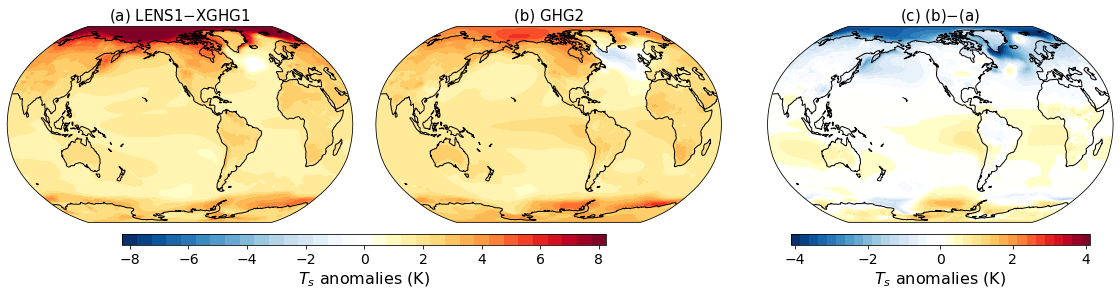

In [9]:
fig = plt.figure(figsize=(16,16))

ci=0.5 ; cmax=8

ax = mymaps.contourmap_bothoceans_robinson_pos(fig, ghg1xway.TREFHT.sel(year=slice(2030,2050)).mean('year'), ghg1xway.lon, ghg1xway.lat,
                                                      ci, -1.*cmax, cmax,'(a) LENS1$-$XGHG1',0.02,0.32,0.8,0.97)

ax = mymaps.contourmap_bothoceans_robinson_pos(fig, ghg2m.TREFHT.sel(year=slice(2030,2050)).mean('year'), ghg2m.lon, ghg2m.lat,
                                               ci,-1.*cmax,cmax,'(b) GHG2',0.34,0.64,0.8,0.97)

ax = cbars.plotcolorbar(fig, ci, -1.*cmax, cmax,'$T_{s}$ anomalies (K)',0.12,0.54,0.78,0.79)

ci=0.25 ; cmax=4

ax = mymaps.contourmap_bothoceans_robinson_pos(fig, ghg2m.TREFHT.sel(year=slice(2030,2050)).mean('year')-\
                                                   ghg1xway.TREFHT.sel(year=slice(2030,2050)).mean('year'),
                                               ghg1xway.lon, ghg1xway.lat, ci, -1.*cmax,cmax,'(c) (b)$-$(a)',0.68,0.98,0.8,0.97)

ax = cbars.plotcolorbar(fig, ci, -1.*cmax, cmax,'$T_{s}$ anomalies (K)',0.7,0.96,0.78,0.79)

fig.savefig(plotpath+'figS15.pdf', bbox_inches='tight', facecolor='white')